# Week 3 - Classification

This week, we shift from gathering human textual classifications through crowdsourcing, to using machine learning models and algorithms that train on those human classifications and extend them to documents far too numerous to read. If you recall, *clustering* allows us to stably partition text data (e.g., documents, turns of conversation) according to all patterns of covariation among available text features. *Classification*, by contrast, partitions text data according to only those features and their variation that enable us to mimic and extrapolate human annotations.

In this notebook, we will show how to use a variety of classification methods, including Naïve Bayes, Logistic regression, K-nearest neighbor, decision trees and random forests, support vector machines and even a simple neural network, the perceptron. We will also demonstrate ensemble techniques that can link several such methods into a single, more accurate, classification pipeline. We will finally learn to use conventions and metrics to evaluate classifier performance on out-of-sample data. 

For this notebook we will be using the following packages.

In [2]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math
import pandas as pd

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import datasets
import pandas as pd
import re

# Simple Simulated Examples

Here we create a sandbox for you to explore different types of classified data and how different statistical classifiers perform on each type.

## Generating example data

We start by loading one of the "cartoon" or simplified data sets and then dividing it into training and testing sets. To maximize our ability to visualize, each dataset involves two classes, colored yellow and blue, arrayed along two two dimensions (`x` and `y`). 

The four data patterns include: 
+ `random` in which the two classes are randomly distributed across both dimensions
+ `andSplit` in which the two classes are linearly split along one of two dimensions (e.g., men like Adidas)
+ `xorSplit` in which the two classes are split, oppositely, along each dimension (e.g., old ladies and young men like Nikes)
+ `targetSplit` in which one class is nested within the other in two dimensions (e.g., middle aged, middle income people like vintage Mustangs)
+ `multiBlobs` in which 5 classes are placed as bivariate Gaussians at random locations

`noise` is a variable [0-1] that ranges from no noise in the prescribed pattern [0] to complete noise/randomness [1].

Uncomment (remove the # in front of) each dataset, one at a time, and then run the cell and subsequent cells to examine how each machine learning approach captures each pattern.

In [34]:
noise = .2

#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.random())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise))
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(noise)) #Please try this one
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(noise))
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(noise))

We can easily visualize the rendered datasets because they are generated in two dimensions.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


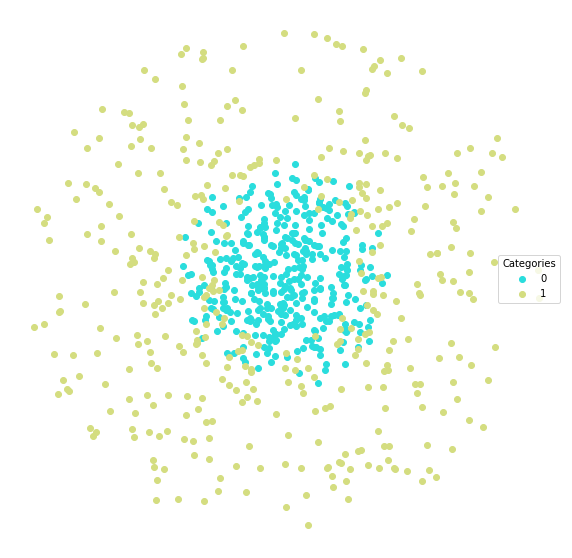

In [35]:
lucem_illud_2020.plotter(dfTrain)

## Training a Machine Learning algorithm

We can now pick a model, there are many more options in `scikit-learn`. These are just a few examples, which array along the machine learning "tribes" described in Pedro Domingos _The Master Algorithm_.

Uncomment (remove the # in front of) each algorithm one at a time, then run the cell and subsequent cells to evaluate how it learns to understand the data.

In [36]:
#Bayes
#clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
#clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
#clf = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
#clf = sklearn.ensemble.GradientBoostingClassifier()

Now we fit the model by giving it our training data

In [37]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

## Algorithm evaluation

We can look at few measurements of each classifier's performance by using the testing set

In [38]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.325,0.661905,0.629870,0.621880,0.92381
1,0.325,0.661905,0.826087,0.615435,0.40000


This lets us look at which classes do better:

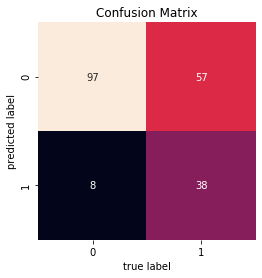

In [39]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)

The greater the area under the curve the better.

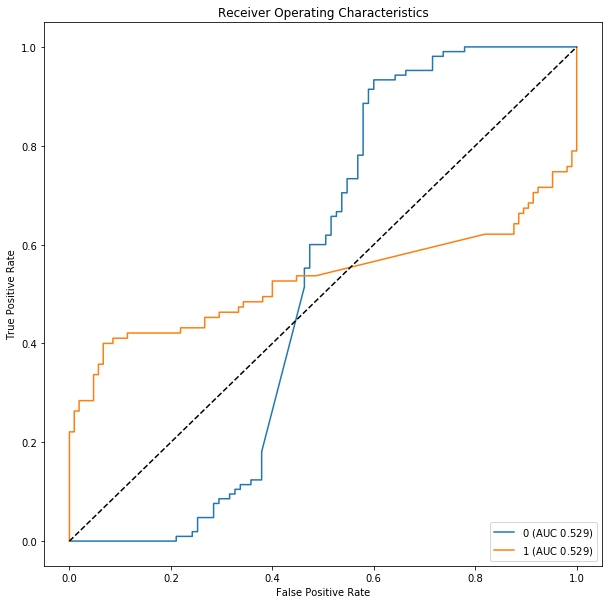

In [40]:
lucem_illud_2020.plotMultiROC(clf, dfTest)

We can also look at the regions the classifer identifies as one class or the other:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


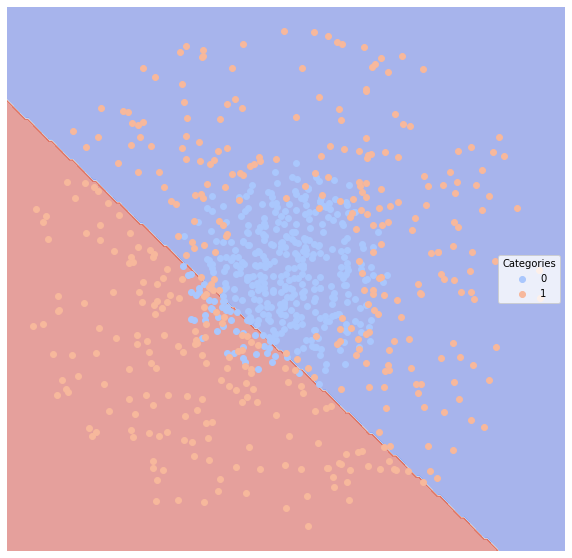

In [41]:
lucem_illud_2020.plotregions(clf, dfTrain)

## Now we do the same for real data

Available data sets include:
+ Reddit threads "classified" by thread topic
+ 20 newsgroups "classified" by group topic
+ Senate press releases "classified" by Senator (2 senators)
+ Senate press releases "classified" by Senator (5 senators)
+ Emails classified as Spam or Ham

In [56]:
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadReddit())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadNewsGroups())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateSmall())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateLarge())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSpam())

Loading Reddit data
Converting to vectors


In [ ]:
#Bayes
clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
#clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up, but lose ROC
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
#clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
#clf = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
#clf = sklearn.ensemble.GradientBoostingClassifier()

In [43]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [44]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.325,0.661905,0.629870,0.621880,0.92381
1,0.325,0.661905,0.826087,0.615435,0.40000


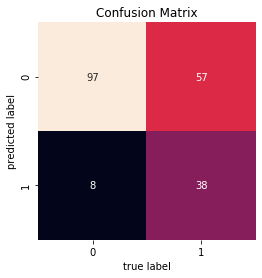

In [45]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)

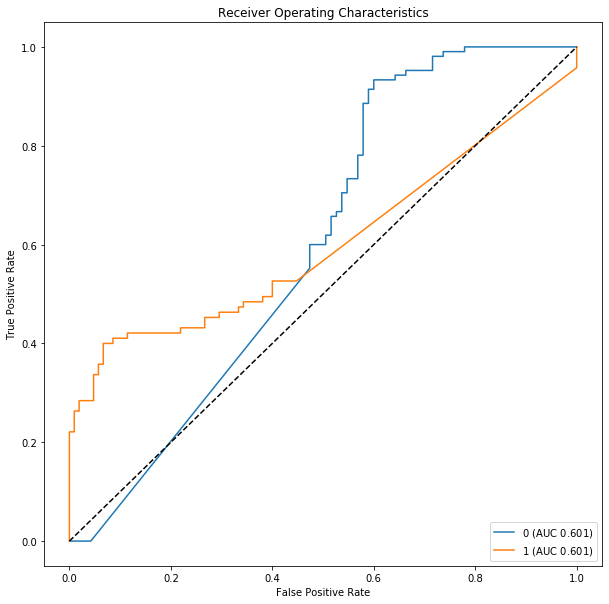

In [46]:
lucem_illud_2020.plotMultiROC(clf, dfTest)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


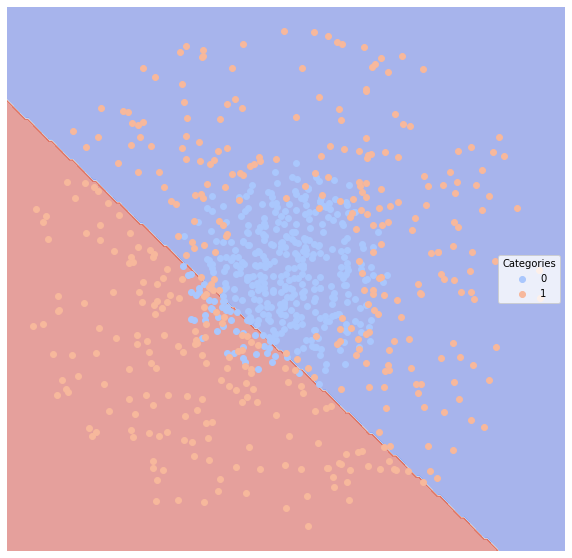

In [47]:
lucem_illud_2020.plotregions(clf, dfTrain)

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Go back through all of the cells above and generate 10 distinct artificial datasets and classify them with all of the available methods. Add a cell immediately below and describe which classifier(s) worked best with which artificially constructed data source and why. Then go through all of the empirical datasets (i.e., Newsgroups, Senate Small, Senate Large, Email Spam) and classify them with all available methods. Add a second cell immediately below and describe which classifier(s) worked best with which data set and why.

<span style="color:red">***Stretch*** (but also required) Wander through the SKLearn documentation available [here](http://scikit-learn.org/stable/), particularly perusing the classifiers. In cells following, identify and implement a new classifier that we have not yet used (e.g., AdaBoost, CART) on one artificial dataset and one real dataset (used above). Then, in the next cell describe the classifier, detail how it compares with the approaches above, and why it performed better or worse than others.

In [48]:
# generate 10 distinct artificial data sets
noise = .2
dfTrain1, dfTest1 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.random())
dfTrain2, dfTest2 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise))
dfTrain3, dfTest3 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(noise)) 
dfTrain4, dfTest4 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(noise))
noise = .3
dfTrain5, dfTest5 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise))
dfTrain6, dfTest6 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(noise)) 
dfTrain7, dfTest7 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(noise))
noise = .4
dfTrain8, dfTest8 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise))
dfTrain9, dfTest9 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(noise)) 
dfTrain10, dfTest10 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(noise))

train_dfs = [dfTrain1, dfTrain2, dfTrain3, dfTrain4, dfTrain5, dfTrain6, dfTrain7, dfTrain8, dfTrain9, dfTrain10]
test_dfs = [dfTest1, dfTest2, dfTest3, dfTest4, dfTest5, dfTest6, dfTest7, dfTest8, dfTest9, dfTest10]

In [49]:
#classifiers

#Bayes
nb = sklearn.naive_bayes.GaussianNB()
#Analogizes
svm_linear = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up
svm_poly = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
knn = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'
#Classical Regression
linear = sklearn.linear_model.LogisticRegression()
#Symbolists
dt = sklearn.tree.DecisionTreeClassifier()
rf = sklearn.ensemble.RandomForestClassifier()
#Connectionists
mlp = sklearn.neural_network.MLPClassifier()
#Ensemble
gb = sklearn.ensemble.GradientBoostingClassifier()

models = [nb, svm_linear, svm_poly, knn, linear, dt, rf, mlp, gb]
model_names = ['Naive Bayes','Linear SVM', 'Poly SVM', 'KNN', 'Linear Regression', 
               'Decision Tree','Random Forest', 'MLP', 'Gradient Boosting']

In [50]:
#loop through classifiers
def classifiers(train, test, models, model_names):
    indices = []
    model_used = []
    auc = []
    for i in range(len(train)):
        for j in range(len(models)):
            indices.append(i)
            model_used.append(model_names[j])
            model = models[j]
            model.fit(np.stack(train[i]['vect'], axis=0), train[i]['category'])
            auc.append(lucem_illud_2020.evaluateClassifier(model,test[i])['AUC'][0])
    return indices, model_used, auc

In [51]:
indices, model_used, auc = classifiers(train_dfs, test_dfs, models, model_names)

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/

In [52]:
res = pd.DataFrame(list(zip(indices, model_used, auc)), columns = ['dataset','model','auc'])

In [53]:
data = [0,1,2,3,4,5,6,7,8,9]
for each in data:
    temp = res[res['dataset']==each]
    max_auc = temp['auc'].max()
    model = list(temp[temp['auc']==max_auc]['model'])[0]
    print("For generated dataset", each, "the best model is", model, "with AUC", max_auc)

For generated dataset 0 the best model is Random Forest with AUC 0.5871578099838969
For generated dataset 1 the best model is Random Forest with AUC 0.9180194805194805
For generated dataset 2 the best model is MLP with AUC 0.9126409017713366
For generated dataset 3 the best model is KNN with AUC 0.920915295062224
For generated dataset 4 the best model is Linear SVM with AUC 0.8235174448174143
For generated dataset 5 the best model is Gradient Boosting with AUC 0.9002403846153846
For generated dataset 6 the best model is MLP with AUC 0.8622760484435992
For generated dataset 7 the best model is Poly SVM with AUC 0.8244324432443244
For generated dataset 8 the best model is MLP with AUC 0.8131313131313131
For generated dataset 9 the best model is Naive Bayes with AUC 0.7866146458583433


In [58]:
# empirical
redditTrain, redditTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadReddit())
newsTrain, newsTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadNewsGroups())
smallsenateTrain, smallsenateTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateSmall())
largesenateTrain, largesenateTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateLarge())
spamTrain, spamTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSpam())

Loading Reddit data
Converting to vectors


Loading data for: comp.sys.mac.hardware
Loading data for: comp.windows.x
Loading data for: misc.forsale
Loading data for: rec.autos
Converting to vectors
Loading senate data
Converting to vectors
Loading senator: Klobuchar
Loading senator: Kyl
Loading senator: Kerry
Loading senator: Kohl
Loading senator: Kennedy
Converting to vectors
Loading Spam
Loading Ham
Converting to vectors


In [59]:
redditTrain.head(5)

,Unnamed: 0,author,over_18,score,subreddit,text,title,url,category,tokenized_text,normalized_text,vect
45,45,n122333,False,6307,Tales From Tech Support,A tale from the other side - my friend bought ...,"I called google, they fixed it.",https://www.reddit.com/r/talesfromtechsupport/...,Tales From Tech Support,"[A, tale, from, the, other, side, my, friend, ...","[tale, friend, buy, netflix, box, tv, work, as...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
806,806,Redditisquiteamazing,False,429,Weeaboo Tales: stories about the extreme fans ...,Author's note: So this is my first time postin...,The Weeb who tried to hit on my Girlfriend.,https://www.reddit.com/r/weeabootales/comments...,Weeaboo Tales,"[Author, 's, note, So, this, is, my, first, ti...","[author, note, time, post, have, lurk, try, bu...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
611,611,glitter_quitter,False,42,Bad Roommates: Tales of Irritation,The moral of my story is: always trust your in...,My spoilt housemates ganged up to kick me out ...,https://www.reddit.com/r/badroommates/comments...,Bad Roommates,"[The, moral, of, my, story, is, always, trust,...","[moral, story, trust, instinct, leave, uni, ho...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1263,1263,DarnellTheBear,False,3908,Relationships,[Part I:] (https://www.reddit.com/r/relationsh...,UPDATE: My [18 M] girlfriend [20 F] of 6 month...,https://www.reddit.com/r/relationships/comment...,Relationships,"[Part, I, https://www.reddit.com/r/relationshi...",[https://www.reddit.com/r/relationships/commen...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1138,1138,CaptnCheerio,False,112,Weeaboo Tales: stories about the extreme fans ...,Go back [here](http://www.reddit.com/r/weeaboo...,The Chronicles of Weebette - The Arranged Marr...,https://www.reddit.com/r/weeabootales/comments...,Weeaboo Tales,"[Go, back, here](http://www.reddit.com, r, wee...","[here](http://www.reddit.com, r, weeabootales,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [60]:

emp_train_dfs = [redditTrain, newsTrain, smallsenateTrain, largesenateTrain, spamTrain]
emp_test_dfs = [redditTest, newsTest, smallsenateTest, largesenateTest, spamTest]

In [63]:
indices_emp, model_emp, auc_emp = classifiers(emp_train_dfs, emp_test_dfs, models, model_names)

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricW

In [64]:
emp_res = pd.DataFrame(list(zip(indices_emp, model_emp, auc_emp)), columns = ['dataset','model','auc'])

In [65]:

data_name = ['Reddit', 'News', 'Small Senate', 'Large Senate', 'Spam']
for n in range(5):
    temp = emp_res[emp_res['dataset']==n]
    max_auc = temp['auc'].max()
    model = list(temp[temp['auc']==max_auc]['model'])[0]
    print("For dataset", data_name[n], "the best model is", model, "with AUC", max_auc)

For dataset Reddit the best model is Linear Regression with AUC 0.9733544938189107
For dataset News the best model is MLP with AUC 0.9068040132476135
For dataset Small Senate the best model is Random Forest with AUC 1.0
For dataset Large Senate the best model is Gradient Boosting with AUC 0.9988738738738739
For dataset Spam the best model is Naive Bayes with AUC 0.8244612655649027


# Clinton / Obama Press Releases

We often will not have nicely prepared data, so we will work though the proccess of cleaning and structuring in more detail here:

While the Clinton and Obama Senatorial Press Releases are not hand-coded, we can imagine that we have been given a stack of such press releases, but lost the metadata associated with which senatorial office issued which. If we label a few of them, how well can our classifier do at recovering the rest? 

In [66]:
ObamaClintonReleases = pandas.read_csv('../data/ObamaClintonReleases.csv', index_col=0)



Let's turn the 'targetSenator' column into a binary category variable.

In [67]:
ObamaClintonReleases['category'] = [s == 'Obama' for s in ObamaClintonReleases['targetSenator']]

Tokenize and normalize

In [68]:
ObamaClintonReleases['tokenized_text'] = ObamaClintonReleases['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
ObamaClintonReleases['normalized_text'] = ObamaClintonReleases['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

Let's split the data into training data and testing data.

In [69]:
holdBackFraction = .2
train_data_df, test_data_df = lucem_illud_2020.trainTestSplit(ObamaClintonReleases, holdBackFraction=holdBackFraction)

In [70]:
print(len(train_data_df))
print(len(test_data_df))

1368
341


## Logistic Regression

First, let's try with a logistic regression, which may be familiar to you from statistical methods classes. First, we must turn the training dataset into a tf-idf matrix (`lucem_illud_2020.generateVecs()` will help with this but for now we are doing it the long way):

In [71]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['text'])


In [122]:
TFVectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=100, max_features=None,
                min_df=2, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

Note that we can use the CountVectorizer instead, which simply produces a matrix of word counts.

In [72]:
TFVects.shape

(1368, 11254)

We can save this in the dataframe to make things easier

In [73]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

In [182]:
train_data_df['vect'][0]

array([0., 0., 0., ..., 0., 0., 0.])

In a regression, we cannot have more variables than cases. So, we need to first do a dimension reduction. First, we will approah this with PCA. You have previously seen this in week 3. Here we are not concerned about visualization, but rather classification and so all principal components are calculated. Watch out: we have to use `stack` not `sum` for combining the vectors. We note that you could also use topic loading and embedding dimensions as featured variables.

In [74]:
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data_df['vect'], axis=0))

We can store the PCA space vectors in the dataframe too:

In [75]:
train_data_df['pca'] = [r for r in reduced_data]

Visualization in 2D:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


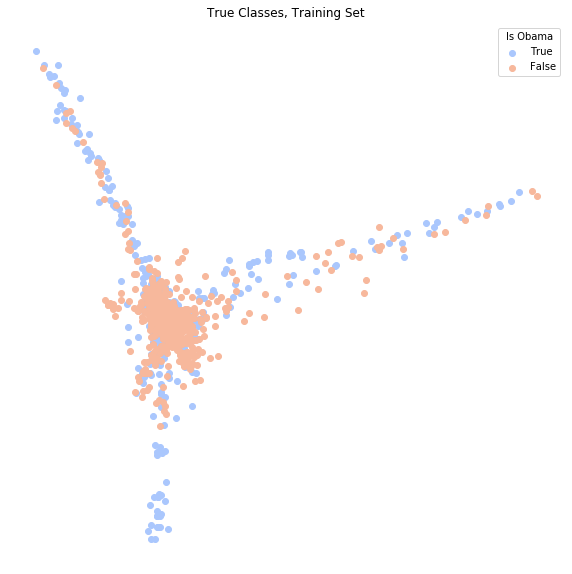

In [76]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot Obama
a = np.stack(train_data_df[train_data_df['category']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "True")

#Plot not Obama
a = np.stack(train_data_df[train_data_df['category'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
    
ax.legend(loc = 'upper right', title = 'Is Obama')
plt.title('True Classes, Training Set')
plt.show()

PCA cannot distinguish Obama very well. Let's perform a screeplot to see how many Principal Components we need.

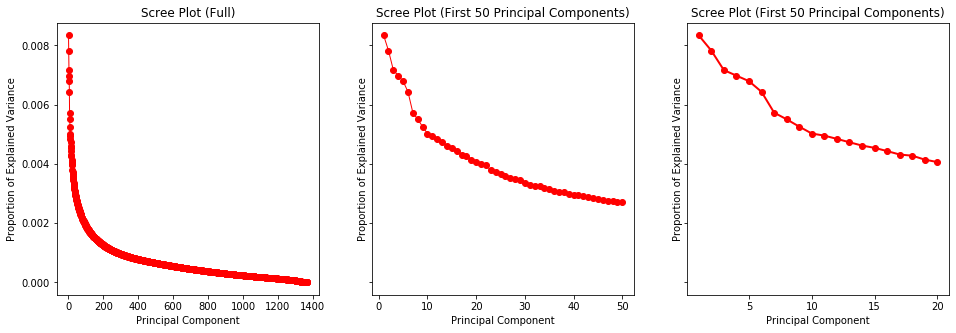

In [77]:
n = len(train_data_df)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(50) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 50 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 50 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

Let's choose the first 10 pricipal components as our covariates.

In [78]:
train_data_df['pca_reduced_10'] = train_data_df['pca'].apply(lambda x: x[:10])

Now we fit a logistic regression to our data.

In [79]:
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Let's see how the logistic regression performs on the training dataset from which we develop the model. Unfortunately, the mean accuracy is only about 64%.

In [80]:
logistic.score(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

0.6747076023391813

How does it perform on the testing dataset, which we "held out" and did not use for model training? We need to repeat all the steps on the testing data, but without retraining:

In [81]:
#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['text'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data_df['vect'], axis=0))
test_data_df['pca'] = [r for r in reduced_data_test]
test_data_df['pca_reduced_10'] = test_data_df['pca'].apply(lambda x: x[:10])

#Test
logistic.score(np.stack(test_data_df['pca_reduced_10'], axis=0), test_data_df['category'])

0.6451612903225806

Slightly poorer. How about using more dimensions (40)?

In [82]:
train_data_df['pca_reduced_40'] = train_data_df['pca'].apply(lambda x: x[:40])
test_data_df['pca_reduced_40'] = test_data_df['pca'].apply(lambda x: x[:40])

logistic.fit(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_40'], axis=0), test_data_df['category']))

Training:
0.7478070175438597
Testing:
0.7067448680351907


Or still more (100)?

In [83]:
train_data_df['pca_reduced_100'] = train_data_df['pca'].apply(lambda x: x[:100])
test_data_df['pca_reduced_100'] = test_data_df['pca'].apply(lambda x: x[:100])

logistic.fit(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_100'], axis=0), test_data_df['category']))

Training:
0.8384502923976608
Testing:
0.7771260997067448


Or even more (200)!

In [84]:
train_data_df['pca_reduced_200'] = train_data_df['pca'].apply(lambda x: x[:200])
test_data_df['pca_reduced_200'] = test_data_df['pca'].apply(lambda x: x[:200])

logistic.fit(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_200'], axis=0), test_data_df['category']))

Training:
0.8728070175438597
Testing:
0.8035190615835777


This is becoming ridiculous (400)!

In [85]:
train_data_df['pca_reduced_400'] = train_data_df['pca'].apply(lambda x: x[:400])
test_data_df['pca_reduced_400'] = test_data_df['pca'].apply(lambda x: x[:400])

logistic.fit(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_400'], axis=0), test_data_df['category']))

Training:
0.9173976608187134
Testing:
0.8093841642228738


Increasing the number of covariates would overfit our data, and it seems that using a logistic regression, our prediction accuracy is at best about 65%. We can, however, try a logistic regression that uses the TF-IDF scores for each word, but with an L1 regularization or L1-norm loss function, which is also known as least absolute deviations (LAD), least absolute errors (LAE) or L1 penalty. It minimizes the sum of the absolute differences (S) between the target value ($Y_i$) and the estimated values ($f(x_i)$) and prunes all insignificant variables (i.e., word TF-IDF scores):

$S=\sum^n_{i=1}|y_i=f(x_i)|$

The result is a model retaining only the most individually significant features.

In [91]:
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l1')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
print(logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))

0.8486842105263158


Train the model using training data, and then test it on the testing data.

In [92]:
print(logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

0.8299120234604106


81% accuracy seems like the best we can get by using a logistic regression.

Now let's try with Naive Bayes. Classically, it is trained with word counts, but TF-IDF vectors are also quite good:

In [93]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [94]:
print("Training:")
print(naiveBayes.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing:")
print(naiveBayes.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Training:
0.952485380116959
Testing:
0.8475073313782991


A bit better than the logit, but that's just looking at the accuracy. What about other measures? Let's first save the predictions in the dataframe to save use rerunning the model every time:

In [98]:
test_data_df['nb_predict'] = naiveBayes.predict(np.stack(test_data_df['vect'], axis=0))
test_data_df['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0] #other is prop false


0.62780981763121

Precision:

In [96]:
sklearn.metrics.precision_score(test_data_df['category'], test_data_df['nb_predict'])

0.8267716535433071

Recall:

In [99]:
sklearn.metrics.recall_score(test_data_df['category'], test_data_df['nb_predict'])

0.7777777777777778

F1-measure:

In [100]:
sklearn.metrics.f1_score(test_data_df['category'], test_data_df['nb_predict'])

0.8015267175572519

Let's take a look at how well our posterior distribution looks relative to the truth.

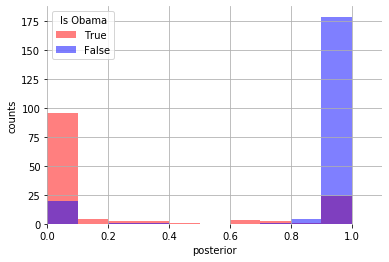

In [101]:
fig, ax = plt.subplots()
ax.grid(False)
ax.set_frame_on(False)
test_data_df[test_data_df['category'].eq(True)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'True', color = 'red')
test_data_df[test_data_df['category'].eq(False)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'False', color = 'blue')
ax.set_xlim((0,1.1))
ax.legend(title = "Is Obama")
ax.set_xlabel('posterior')
ax.set_ylabel('counts')
plt.show()

The classification is suprisingly accurate. We can even look at what words are most influential with a bit of simple math:

In [102]:
#Top indices
trueVals, falseVals = naiveBayes.feature_log_prob_

words_dict = {
    'Obama' : [],
    'Obama_log_prob' : [],
    'Clinton' : [],
    'Clinton_log_prob' : [],
}

for i, prob in sorted(enumerate(trueVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Obama'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Obama_log_prob'].append(prob)

for i, prob in sorted(enumerate(falseVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Clinton'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Clinton_log_prob'].append(prob)
    
pandas.DataFrame(words_dict)

,Obama,Obama_log_prob,Clinton,Clinton_log_prob
0,signature,-2.179790,5566,-1.771140
1,fy,-2.310151,amy,-1.791759
2,ground,-2.348866,brundage,-1.867471
3,island,-2.362111,dick,-1.867471
4,welcomed,-2.375534,chicago,-1.999399
5,welcome,-2.389140,temporary,-2.151415
6,urban,-2.416919,political,-2.212973
7,urged,-2.431104,location,-2.228973
8,urging,-2.431104,reform,-2.245234
9,read,-2.445493,don,-2.295665


## Multinomial Naive Bayes

What if we want to classify our text into one of *many* classes? The multinomial Naive Bayes generating model assumes that document features (e.g., words) are generated by draws from a multinomial distribution (recall this gives the probability to observe a particular pattern of counts across features). 

Let's use again the dataset we used in week 3, the 20 newsgroup dataset.

In [85]:
newsgroups = sklearn.datasets.fetch_20newsgroups(data_home = '../data') #Free data to play with: documents from a newsgroup corpus.
newsgroups.target_names #Possible categories, i.e., the newsgroups

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

We can pick specific categories, and pull the relevant training and testing sets. 

In [87]:
target_categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics'] #Can change these of course

newsgroupsDF = pandas.DataFrame(columns = ['text', 'category', 'source_file'])
for category in target_categories:
    print("Loading data for: {}".format(category))
    ng = sklearn.datasets.fetch_20newsgroups(categories = [category], remove=['headers', 'footers', 'quotes'], data_home = '../data')
    newsgroupsDF = newsgroupsDF.append(pandas.DataFrame({'text' : ng.data, 'category' : [category] * len(ng.data), 'source_file' : ng.filenames}), ignore_index=True)

Loading data for: talk.religion.misc
Loading data for: soc.religion.christian
Loading data for: sci.space
Loading data for: comp.graphics


Now we need to tokenize, and make a training and testing set:

In [88]:
newsgroupsDF['tokenized_text'] = newsgroupsDF['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
newsgroupsDF['normalized_text'] = newsgroupsDF['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [106]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud_2020.trainTestSplit(newsgroupsDF, holdBackFraction=holdBackFraction)

In [107]:
print(len(train_ng_df))
print(len(test_ng_df))

1723
430


We need to extract features from the text. We can use built-in feature extraction to do so. We will use a tf-idf vectorizer, which converts the document into a vector of words with tf-idf weights (term-frequency inverse-document frequency). This gives high weight to words that show up a lot in a given document, but rarely across documents in the corpus (more distinctive). 

In [108]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

Now we can train the model:

In [109]:
MultinomialNB_ng = sklearn.naive_bayes.MultinomialNB()
MultinomialNB_ng.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

...and save predictions to the dataframe:

In [110]:
train_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(train_ng_df['vect'], axis=0))
print("Training score:")
print(MultinomialNB_ng.score(np.stack(train_ng_df['vect'], axis=0), train_ng_df['category']))

Training score:
0.8949506674405108


In [111]:
train_ng_df[['category', 'nb_predict']][:10]

,category,nb_predict
2021,comp.graphics,comp.graphics
259,talk.religion.misc,talk.religion.misc
23,talk.religion.misc,talk.religion.misc
1412,sci.space,sci.space
935,soc.religion.christian,soc.religion.christian
726,soc.religion.christian,soc.religion.christian
1024,sci.space,sci.space
219,talk.religion.misc,talk.religion.misc
281,talk.religion.misc,soc.religion.christian
1743,comp.graphics,comp.graphics


Looks pretty good, lets examine the testing dataset:

In [112]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(MultinomialNB_ng.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.7767441860465116


We can even use a confusion matrix, like we used last week for evaluating human coders relative to one another. Now we are evaluating our classifier relative to human coding. We'll just use the one in `lucem_illud_2020`, which requres a classifier and a dataframe with `'vect'` and `'category'` columns, like we have in the examples:

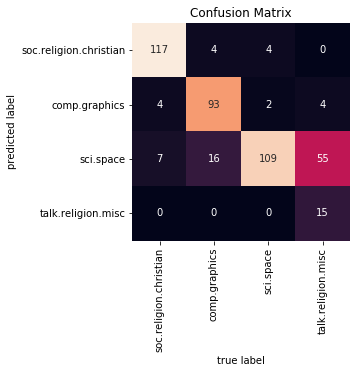

In [113]:
lucem_illud_2020.plotConfusionMatrix(MultinomialNB_ng, test_ng_df)

Let's calculate the precision, recall, and F-measures.

In [118]:
print(sklearn.metrics.precision_score(test_ng_df['category'], test_ng_df['nb_predict'], average = 'weighted')) #precision
print(sklearn.metrics.recall_score(test_ng_df['category'], test_ng_df['nb_predict'], average = 'weighted')) #recall
print(sklearn.metrics.f1_scoretest_ng_df(['category'], test_ng_df['nb_predict'], average = 'weighted')) #F-1 measure

0.8438818878490454
0.7767441860465116


AttributeError: module 'sklearn.metrics' has no attribute 'f1_scoretest_ng_df'

We can evaluate these per catagory. This has the same requiments as `plotConfusionMatrix`:

In [119]:
lucem_illud_2020.metrics.evaluateClassifier(MultinomialNB_ng, test_ng_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
talk.religion.misc,0.137209,0.601351,1.000000,0.339912,0.202703
sci.space,0.069767,0.895732,0.902913,0.789617,0.823009
soc.religion.christian,0.195349,0.850104,0.582888,0.566430,0.947826
comp.graphics,0.044186,0.943786,0.936000,0.881144,0.914062


We can also plot the ROC curves. This has the same requiments as `plotConfusionMatrix`:

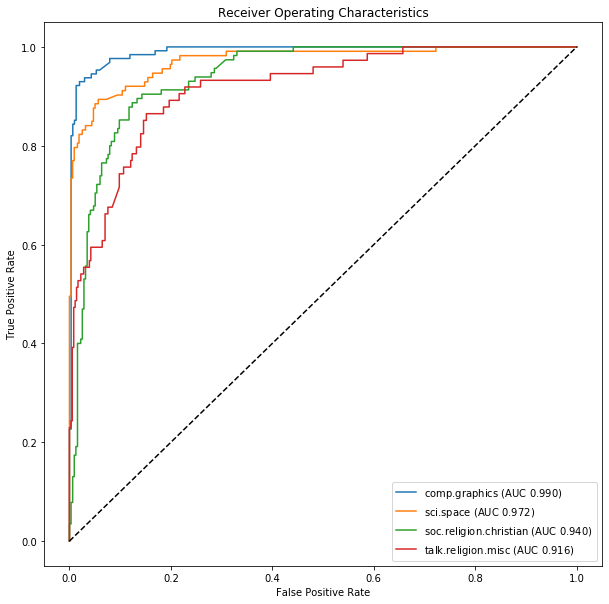

In [120]:
lucem_illud_2020.plotMultiROC(MultinomialNB_ng, test_ng_df)

And we can plot the PCA space visualization:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

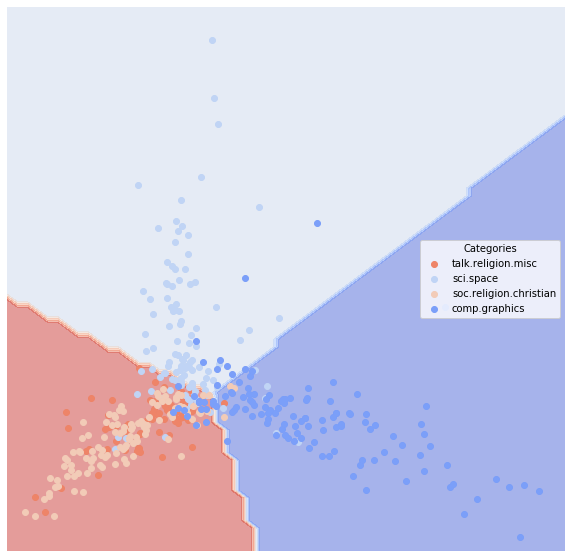

In [121]:
lucem_illud_2020.plotregions(MultinomialNB_ng, test_ng_df)

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">In the cells immediately following, perform Logistic and Naïve Bayes classification (binary or multinomial) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project (e.g., these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week). Visualize the confusion matrix for training and testing sets. Calculate precision, recall, the F-measure, and AUC, then perform an ROC visualization. How do these classifiers perform? Exrapolate codes from these models to all uncoded data.


Datasets include true news and fake news from Kaggle.

In [37]:
true_news = pd.read_csv('True.csv')
fake_news = pd.read_csv('Fake.csv')

In [38]:
# tag
true_news['category'] = 'True'
fake_news['category'] = 'Fake'

In [39]:
news = pd.concat([true_news[:5000], fake_news[:5000]], ignore_index=True)

In [40]:
news

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True
...,...,...,...,...,...
9995,FBI Warns Republicans: Do Not Leak Clinton Em...,It s no secret Republicans are salivating to f...,News,"August 18, 2016",Fake
9996,Justice Department Announces It Will No Longe...,Republicans are about to lose a huge source of...,News,"August 18, 2016",Fake
9997,WATCH: S.E. Cupp Destroys Trump Adviser’s ‘Fa...,A pawn working for Donald Trump claimed that w...,News,"August 18, 2016",Fake
9998,WATCH: Fox Hosts Claim Hillary Has Brain Dama...,Fox News is desperate to sabotage Hillary Clin...,News,"August 18, 2016",Fake


In [41]:
# clean function
def clean(text):
    text = re.sub("[\(\[].*?[\)\]\-]", "", text)
    text = re.sub('\s+', ' ', text)
    return text.strip()

In [42]:
# clean text
news['text'] = news['text'].apply(clean)


In [43]:
# apply tfidf vectorizer
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(news['text'])
news['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

In [44]:
#train test split
holdBackFraction = .2
news_train, news_test = lucem_illud_2020.trainTestSplit(news, holdBackFraction=holdBackFraction)

Logistic Regression

In [53]:
#pca for train
pca = sklearn.decomposition.PCA()
reduced_data_train = pca.fit_transform(np.stack(news_train['vect'], axis=0))
news_train['pca'] = [r for r in reduced_data_train]

#pca for test
reduced_data_test = pca.fit_transform(np.stack(news_test['vect'], axis=0))
news_test['pca'] = [r for r in reduced_data_test]

#limit to first 3 PCs
news_train['pca_reduced'] = news_train['pca'].apply(lambda x: x[:3])
news_test['pca_reduced'] = news_test['pca'].apply(lambda x: x[:3])

#fit logistic regression
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(news_train['pca_reduced'], axis=0), news_train['category'])

#print score
print('Training set performance:')
print(logistic.score(np.stack(news_train['pca_reduced'], axis=0), news_train['category']))
print('Testing set performance')
print(logistic.score(np.stack(news_test['pca_reduced'], axis=0), news_test['category']))


Training set performance:
0.6665
Testing set performance
0.5125


In [57]:
logistic= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic.fit(np.stack(news_train['vect'], axis=0), news_train['category'])
print('Logistic Regression Train performance')
print(logistic.score(np.stack(news_train['vect'], axis=0), news_train['category']))
print('Logistic Regression Test performance')
print(logistic.score(np.stack(news_test['vect'], axis=0), news_test['category']))

Logistic Regression Train performance
0.978875
Logistic Regression Test performance
0.925


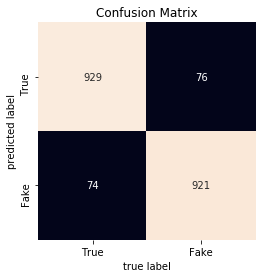

In [59]:
lucem_illud_2020.plotConfusionMatrix(logistic, news_test)

In [60]:
#save result to dataframe
news_test['lr_predict'] = logistic.predict(np.stack(news_test['vect'], axis=0))

#setting michael jackson as the positive label
print('Precision')
print(sklearn.metrics.precision_score(news_test['category'], news_test['lr_predict'], pos_label='True'))
print('Recall')
print(sklearn.metrics.recall_score(news_test['category'], news_test['lr_predict'], pos_label='True'))
print('F1')
print(sklearn.metrics.f1_score(news_test['category'], news_test['lr_predict'], pos_label='True'))

Precision
0.9256281407035176
Recall
0.9237713139418254
F1
0.9246987951807228


Naive Bayes

In [46]:
#fit naive bayes
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(news_train['vect'], axis=0), news_train['category'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [47]:
print("Training:")
print(naiveBayes.score(np.stack(news_train['vect'], axis=0), news_train['category']))
print("Testing:")
print(naiveBayes.score(np.stack(news_test['vect'], axis=0), news_test['category']))

Training:
0.966625
Testing:
0.944


In [48]:
#save results
news_test['nb_predict'] = naiveBayes.predict(np.stack(news_test['vect'], axis=0))
news_test['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(news_test['vect'], axis=0))[:,0]
news_test

,title,text,subject,date,category,vect,nb_predict,nb_predict_prob_true
1242,Rouhani says Iran will stay in nuclear deal on...,ANKARA - Iran harshly reacted to President Don...,politicsNews,"October 13, 2017",True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,1.862371e-22
742,House panel drops effort to force testimony on...,WASHINGTON - A congressional panel on Wednesda...,politicsNews,"November 8, 2017",True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0851176548870...",True,1.039921e-12
8320,Republicans Refuse To Stand Up To Trump Becau...,Republicans are spineless cowards.If you want ...,News,"December 21, 2016",Fake,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Fake,1.000000e+00
8285,"Bernie Sanders PUMMELS Trump, Gives Him PERFE...",President-elect Donald Trump needs his Twitter...,News,"December 23, 2016",Fake,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Fake,1.000000e+00
595,U.S. lawmakers seek more information from Trum...,WASHINGTON - Jared Kushner’s lawyer failed to ...,politicsNews,"November 16, 2017",True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,2.603085e-12
...,...,...,...,...,...,...,...,...
3957,Florida LGBT rights push reflects changing times,"TALLAHASSEE, Fla. - A Republican, a Democrat a...",politicsNews,"May 2, 2017",True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True,9.223072e-17
7864,Trump Tries To Stick It To Press With Inaugur...,"As of Tuesday morning, it seemed that Trump wa...",News,"January 24, 2017",Fake,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Fake,1.000000e+00
6016,Here Is A Comprehensive And Up To Date List O...,Donald Trump rode into the presidency with all...,News,"June 25, 2017",Fake,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Fake,1.000000e+00
7526,REPORT: Russia Taunts And Tests United States...,Russia is testing how far Donald Trump will le...,News,"February 14, 2017",Fake,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Fake,8.765649e-01


In [49]:
print('Precision')
print(sklearn.metrics.precision_score(news_test['category'], news_test['nb_predict'], pos_label='True'))
print('Recall')
print(sklearn.metrics.recall_score(news_test['category'], news_test['nb_predict'], pos_label='True'))
print('F1')
print(sklearn.metrics.f1_score(news_test['category'], news_test['nb_predict'], pos_label='True'))

Precision
0.9234449760765551
Recall
0.9679037111334002
F1
0.9451518119490695


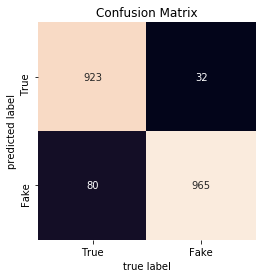

In [50]:
lucem_illud_2020.plotConfusionMatrix(naiveBayes, news_test)

In [51]:
#Top indices
trueVals, falseVals = naiveBayes.feature_log_prob_

words_dict = {
    'True_News' : [],
    'TN_log_prob' : [],
    'Fake_News' : [],
    'FN_log_prob' : [],
}

for i, prob in sorted(enumerate(trueVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['True_News'].append(TFVectorizer.get_feature_names()[i])
    words_dict['TN_log_prob'].append(prob)

for i, prob in sorted(enumerate(falseVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Fake_News'].append(TFVectorizer.get_feature_names()[i])
    words_dict['FN_log_prob'].append(prob)
    
words_dict = pandas.DataFrame(words_dict)

In [52]:
words_dict

,True_News,TN_log_prob,Fake_News,FN_log_prob
0,sh,-3.839452,wilbur,-3.951493
1,humiliated,-3.862983,mick,-3.964566
2,hypocrite,-3.911773,mulvaney,-3.964566
3,petty,-3.911773,2019,-3.977811
4,reminded,-3.937091,expire,-3.977811
5,skinned,-3.937091,militant,-3.991234
6,insulted,-3.949994,deficits,-4.004839
7,cking,-3.976311,probes,-4.018633
8,trumpcare,-3.989735,procedural,-4.032619
9,ashamed,-4.003340,brussels,-4.046804


Naive Bayes performed pretty well

# Decision Trees

Decision trees can be used to predict both categorical/class labels (i.e., classification) and continuous labels (i.e., regression).

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

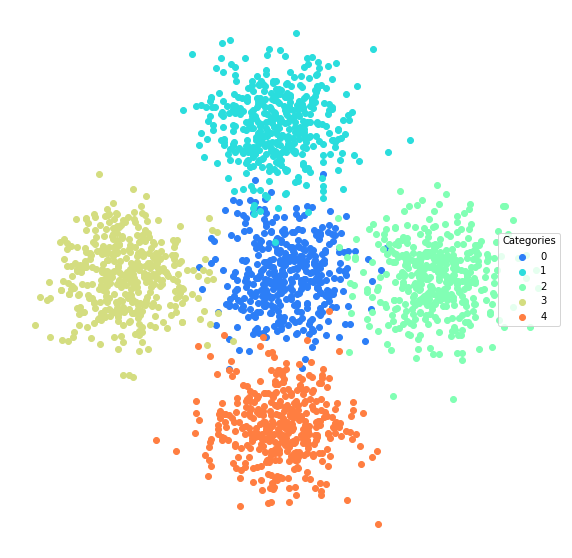

In [61]:
blobs_df = lucem_illud_2020.multiBlobs(noise=.2, centers=[(0,0), (0,5), (5,0), (-5,0), (0,-5)])
df_exampleTree_train, df_exampleTree_test = lucem_illud_2020.trainTestSplit(blobs_df)
lucem_illud_2020.plotter(df_exampleTree_train)

Now we import our Decision Tree classifier from sklearn.tree (familiar syntax) and fit it using the fit method.

In [62]:
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf_tree.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

To see what's going on visually with the classification: 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

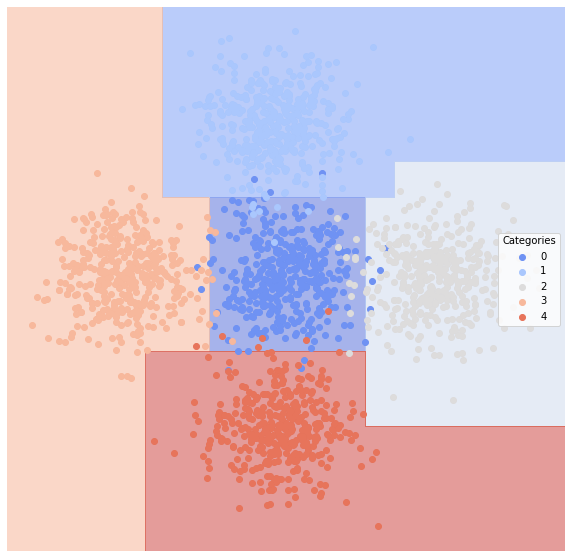

In [63]:
lucem_illud_2020.plotregions(clf_tree, df_exampleTree_train)

In [64]:
lucem_illud_2020.evaluateClassifier(clf_tree, df_exampleTree_test)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.028,0.975061,0.891892,0.878231,0.980198
1,0.012,0.984911,0.960396,0.944994,0.979798
2,0.016,0.955556,1.000000,0.927111,0.911111
3,0.004,0.989899,1.000000,0.983798,0.979798
4,0.004,0.990991,1.000000,0.985982,0.981982


Lets look at accuracy:

In [65]:
sklearn.metrics.accuracy_score(df_exampleTree_test['category'],clf_tree.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))

0.968

What happens if we trim the tree?

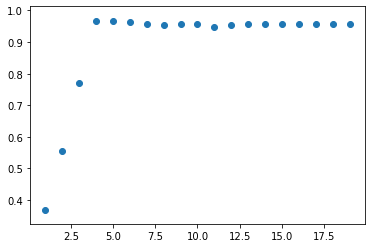

In [66]:
depthvec = []
scorevec = []
for i in range(1,20):
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])
    score = sklearn.metrics.accuracy_score(df_exampleTree_test['category'], tree2.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

We can select different layers of the decision tree or "prune" it. At approximately four layers down in the decision tree, the shape is somewhat odd, suggesting that our model is overfitting beyond those four layers.

Combining multiple overfitting estimators turns out to be a key idea in machine learning. This is called **bagging** and is a type of **ensemble** method. The idea is to make many randomized estimators--each can overfit, as decision trees are wont to do--but then to combine them, ultimately producing a better classification. A **random forest** is produced by bagging decision trees.

In [67]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) #Create an instance of our decision tree classifier.

bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data

In [68]:
bag.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category']) #Fit the bagged classifier

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=10,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
      

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

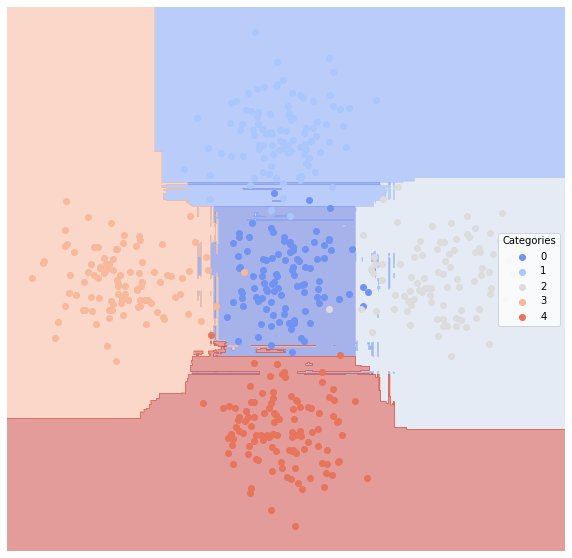

In [69]:
lucem_illud_2020.plotregions(bag, df_exampleTree_test)

In [70]:
lucem_illud_2020.evaluateClassifier(bag, df_exampleTree_test)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.032,0.957766,0.904762,0.863014,0.940594
1,0.008,0.987405,0.979798,0.964004,0.979798
2,0.014,0.978455,0.956044,0.930176,0.966667
3,0.004,0.989899,1.000000,0.983798,0.979798
4,0.006,0.986486,1.000000,0.978973,0.972973


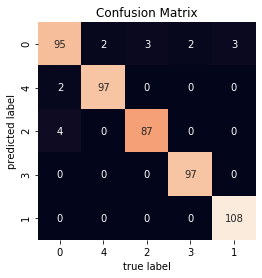

In [71]:
lucem_illud_2020.plotConfusionMatrix(bag, df_exampleTree_test)

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">In the cells immediately following, perform decision tree and random forest classification (binary, multinomial or continuous) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. As with ***Exercise 2***, these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week. Visualize the classification of data points. Calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Now build an ensemble classifier by bagging trees into a random forest. Visualize the result. How do these classifiers perform? What does ensemble learning do?

In [72]:
#fit and train decision tree
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=2)
clf_tree.fit(np.stack(news_train['vect'], axis =0), news_train['category'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2, splitter='best')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


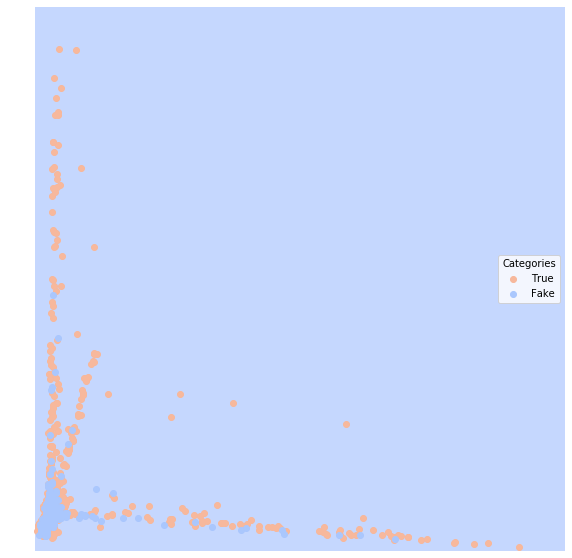

In [73]:
#visualize performance
lucem_illud_2020.plotregions(clf_tree, news_train)

In [74]:
#evaluate decision tree classifier
lucem_illud_2020.evaluateClassifier(clf_tree, news_test)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
True,0.4715,0.529904,0.513946,0.513915,0.997994
Fake,0.4715,0.529904,0.968750,0.530383,0.061815


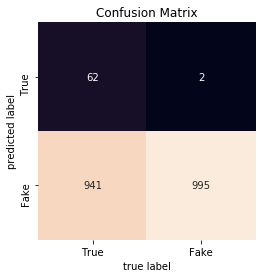

In [75]:
lucem_illud_2020.plotConfusionMatrix(clf_tree, news_test)

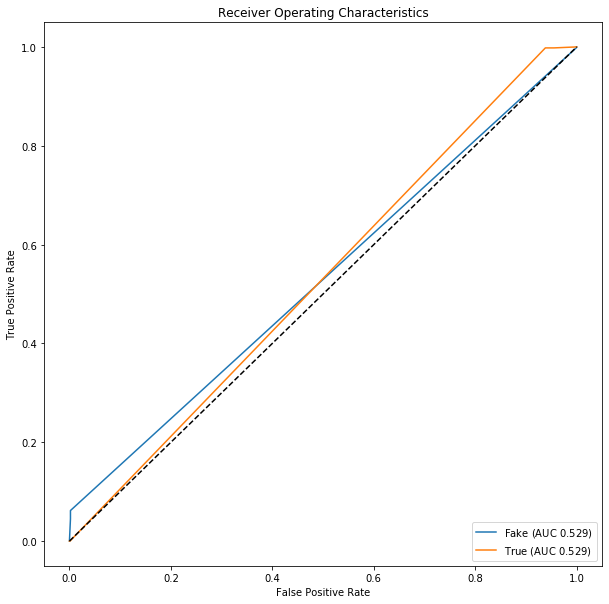

In [76]:
lucem_illud_2020.plotMultiROC(clf_tree, news_test)

In [77]:
#save result to dataframe
news_test['dt_predict'] = clf_tree.predict(np.stack(news_test['vect'], axis=0))
news_test['dt_predict_prob_true'] = clf_tree.predict_proba(np.stack(news_test['vect'], axis=0))[:,0]

#evaluate
print('Precision')
print(sklearn.metrics.precision_score(news_test['category'], news_test['dt_predict'], average='weighted'))
print('Recall')
print(sklearn.metrics.recall_score(news_test['category'], news_test['dt_predict'], average='weighted'))
print('F1')
print(sklearn.metrics.f1_score(news_test['category'], news_test['dt_predict'], average='weighted'))

Precision
0.7420303460743802
Recall
0.5285
F1
0.3965065286557548


Random Forest

In [78]:
#now let's bag different trees together
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) 
bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, 
                                         max_samples=0.8, random_state=2)

In [79]:
bag.fit(np.stack(news_train['vect'], axis =0), news_train['category'])

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=10,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
      

# K-Nearest Neighbors

The K-Nearest neighbors classifier takes a simpler premise than those before: Find the closest labeled datapoint in set and "borrow" its label.

Let's use newsgroup data again.

In [89]:
newsgroupsDF[:5]

,text,category,source_file,tokenized_text,normalized_text
0,\n\nParadise and salvation are not the same th...,talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[Paradise, and, salvation, are, not, the, same...","[paradise, salvation, thing, salvation, well, ..."
1,\nYou're admitting a lot more than that. You ...,talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[You, 're, admitting, a, lot, more, than, that...","[admit, lot, admit, moral, situational, admit,..."
2,"\n\nJesus also recognized other holy days, lik...",talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[Jesus, also, recognized, other, holy, days, l...","[jesus, recognize, holy, day, like, passover, ..."
3,In <lsjc8cINNmc1@saltillo.cs.utexas.edu> turpi...,talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[In, <, lsjc8cINNmc1@saltillo.cs.utexas.edu, >...","[<, lsjc8cinnmc1@saltillo.cs.utexas.edu, >, tu..."
4,"\nI'm sorry, but He does not! Ever read the F...",talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[I, 'm, sorry, but, He, does, not, Ever, read,...","[be, sorry, read, commandment]"


Make a testing and training set:

In [90]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud_2020.trainTestSplit(newsgroupsDF, holdBackFraction=holdBackFraction)

Let's initialize our k-nearest neighbors classifier:

In [91]:
n_neighbors = 15
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

Let's try to classify using the TF-IDF vectors:

In [92]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

In [93]:
clf_knearest.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [94]:
lucem_illud_2020.evaluateClassifier(clf_knearest, train_ng_df)

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
sci.space,0.347069,0.560256,0.366013,0.307631,0.353684
soc.religion.christian,0.282647,0.500000,0.000000,0.282647,0.000000
comp.graphics,0.396982,0.627041,0.363314,0.330955,0.677704
talk.religion.misc,0.334881,0.500198,0.178998,0.178816,0.243506


And lets look at the testing data

In [95]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = clf_knearest.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(clf_knearest.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.28604651162790695


Let's produce another confusion matrix:

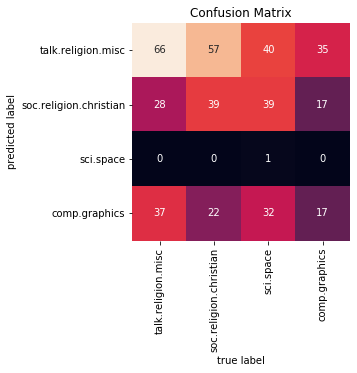

In [96]:
lucem_illud_2020.plotConfusionMatrix(clf_knearest, test_ng_df)

You can produce the PCA space visual if you want, altough it can take a very long time, so we'll leave it optionally commented out:

In [97]:
#lucem_illud_2020.plotregions(clf_knearest, test_ng_df)

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform and visualize k-nearest neighbor classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. Visualize the classification of data points and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Articulate how the *k*-nearest neighbor approach relates to *k*-means clustering explored in ***week 3***?

In [102]:
#set knn with k=2
knn2 = sklearn.neighbors.KNeighborsClassifier(2, weights='uniform')
#fit the model
knn2.fit(np.stack(news_train['vect'], axis = 0), news_train['category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [103]:
#save result to dataframe
news_test['knn2_predict'] = knn2.predict(np.stack(news_test['vect'], axis=0))
news_test['knn2_predict_prob_true'] = knn2.predict_proba(np.stack(news_test['vect'], axis=0))[:,0]

#evaluate
print('Precision')
print(sklearn.metrics.precision_score(news_test['category'], news_test['knn2_predict'], average='weighted'))
print('Recall')
print(sklearn.metrics.recall_score(news_test['category'], news_test['knn2_predict'], average='weighted'))
print('F1')
print(sklearn.metrics.f1_score(news_test['category'], news_test['knn2_predict'], average='weighted'))

Precision
0.669629917530952
Recall
0.5635
F1
0.48388053981932205


# SVMs

Now we will examine Support Vector Machines, an approach that creates the partition that preserves the "maximum margin" between classes.

We will use a few sub forums from reddit--which tend to share text rather than memes--namely `talesfromtechsupport`, `badroommates`, `weeabootales` and `relationships`. The top 100 text posts from each have been saved to `data/reddit.csv`.

In [104]:
redditDf = pandas.read_csv('../data/reddit.csv', index_col = 0)

#Drop a couple missing values

redditDf = redditDf.dropna()

#Set category

redditDf['category'] = redditDf['subreddit']

#tokenize and normalize
redditDf['tokenized_text'] = redditDf['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
redditDf['normalized_text'] = redditDf['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

We will tf.idf the data to make our vectors:

In [105]:
redditTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, min_df=3, stop_words='english', norm='l2')
redditTFVects = redditTFVectorizer.fit_transform([' '.join(l) for l in redditDf['normalized_text']])
redditDf['vect'] = [np.array(v).flatten() for v in redditTFVects.todense()]

Initilize the model and make a train test split:

In [106]:
holdBackFraction = .2
train_redditDf, test_redditDf = lucem_illud_2020.trainTestSplit(redditDf, holdBackFraction=holdBackFraction)

In [107]:
clf_svm = sklearn.svm.SVC(kernel='linear', probability = False)
#probability = True is slower but  lets you call predict_proba()
clf_svm.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

...and consider the results:

In [108]:
lucem_illud_2020.evaluateClassifier(clf_svm, test_redditDf)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Weeaboo Tales: stories about the extreme fans of japanese culture,0.006270,0.990942,0.985915,0.975164,0.985915
Tales From Tech Support,0.009404,0.993852,0.961538,0.961538,1.000000
Relationships,0.021944,0.959464,0.986301,0.929241,0.923077
Bad Roommates: Tales of Irritation,0.018809,0.980545,0.958763,0.944848,0.978947


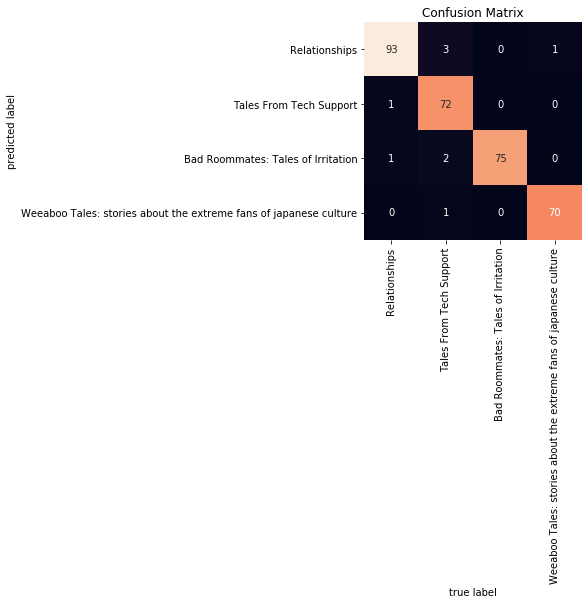

In [109]:
lucem_illud_2020.plotConfusionMatrix(clf_svm, test_redditDf)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

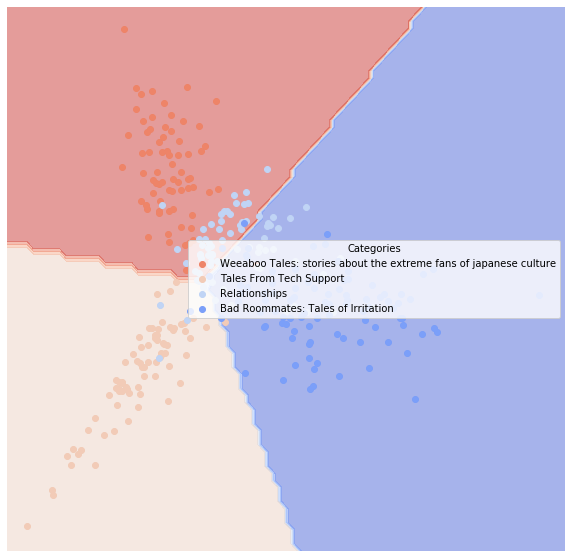

In [110]:
lucem_illud_2020.plotregions(clf_svm, test_redditDf)

SVM

In [111]:
#fit svm
clf_svm = sklearn.svm.SVC(kernel='linear', probability = False)
clf_svm.fit(np.stack(news_train['vect'], axis=0), news_train['category'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


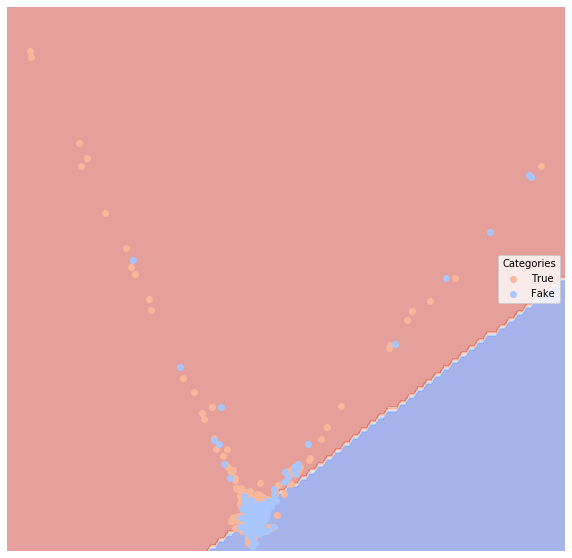

In [113]:
lucem_illud_2020.plotregions(clf_svm, news_test)

# Neural Nets

We include an example of a simple neural network, the Multi-layer Perceptron (MLP) that learns a function $f(\cdot): R^m \rightarrow R^o$ by training on a dataset, where $m$ is the number of dimensions for input and $o$ is the number of dimensions for output. Given a set of features $X = {x_1, x_2, ..., x_m}$ and a target $y$, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. The following figure shows a one hidden layer MLP with scalar output. ![title](../data/multilayerperceptron_network.png) The leftmost layer, known as the input layer, consists of a set of "neurons" $\{x_i | x_1, x_2, ..., x_m\}$ representing the input features (e.g., weighted words). Each neuron in the hidden layer transforms the values from the previous layer with a weighted linear summation $w_1x_1 + w_2x_2 + ... + w_mx_m$, followed by a non-linear activation function $g(\cdot):R \rightarrow R$ - like the logistic or hyperbolic tan function. The output layer receives the values from the last hidden layer and transforms them into output values.

In [114]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [115]:
lucem_illud_2020.evaluateClassifier(clf_nn, test_redditDf)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Weeaboo Tales: stories about the extreme fans of japanese culture,0.009404,0.988925,0.972222,0.961664,0.985915
Tales From Tech Support,0.009404,0.989235,0.973684,0.963837,0.986667
Relationships,0.025078,0.953054,0.986111,0.919558,0.910256
Bad Roommates: Tales of Irritation,0.025078,0.976081,0.939394,0.925887,0.978947


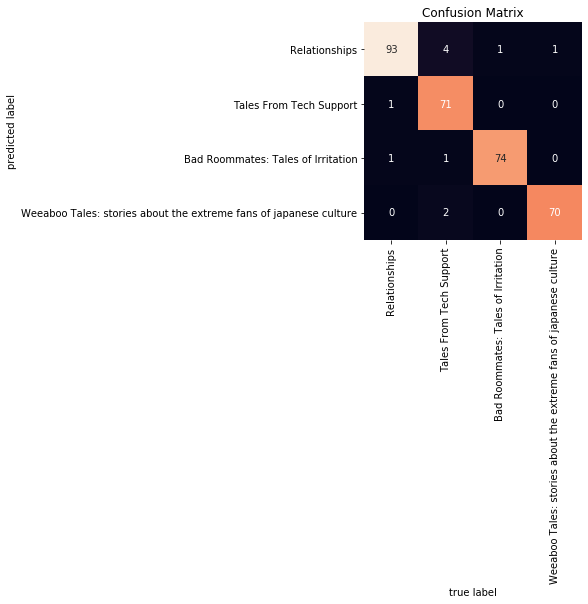

In [116]:
lucem_illud_2020.plotConfusionMatrix(clf_nn, test_redditDf)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

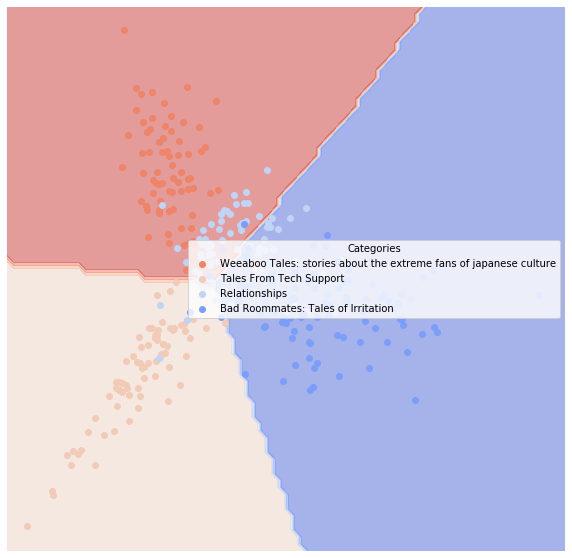

In [117]:
lucem_illud_2020.plotregions(clf_nn, test_redditDf)

It performs very well.

## <span style="color:red">*Exercise 5*</span>

<span style="color:red">In the cells immediately following, perform a neural network classification and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). How does this classify relevant to *k*-nearest neighbor, Naive Bayes, logistic and decision-tree approaches?

In [122]:
# extract a portion of the data because the entire dataset is taking too much computing power
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(news_train['vect'][:1000], axis=0), news_train['category'][:1000])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

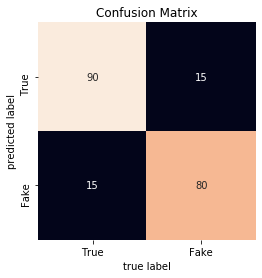

In [123]:
lucem_illud_2020.plotConfusionMatrix(clf_nn, news_test[:200])

In [131]:
prediction = clf_nn.predict(np.stack(news_test['vect'][:200], axis=0))
#evaluate
print('Precision:')
print(sklearn.metrics.precision_score(news_test['category'][:200], prediction, average='weighted'))
print('Recall:')
print(sklearn.metrics.recall_score(news_test['category'][:200], prediction, average='weighted'))
print('F1:')
print(sklearn.metrics.f1_score(news_test['category'][:200], prediction, average='weighted'))

Precision:
0.85
Recall:
0.85
F1:
0.85
